# HW 4: Random Graph Models

## Task 1: HOT Networks
### In this task you are given a core network inspired by an actual infrastructure and you are supposed to connect random nodes to the nodes of this core network according to a power law. Then you are supposed to calculate a performance measure for this network. 
### Then, you are supposed to create a preferential attachment random graph based on the Barabasi-Albert model with the same number of nodes and compare the perfomance measure of this network to the first network. 
### Step 1: Create the following graph in NetworkX.

![Core.png](attachment:Core.png)

In [0]:
# import required packages

%pylab inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import time
import os

Populating the interactive namespace from numpy and matplotlib


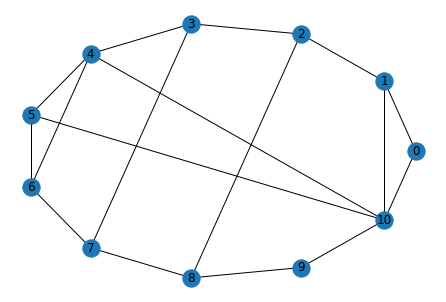

In [0]:
# Your code here
simple_g=nx.Graph()
simple_g.add_nodes_from([0,1,2,3,4,5,6,7,8,9,10])
simple_g.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,5),\
                     (5,6),(6,7),(7,8),(8,9),(9,10),\
                     (10,0),(1,10),(2,8),(3,7),(4,10),(5,10),(4,6)])
nx.draw_circular(simple_g,with_labels=True)

### To each node of the above core network connect a random number of new nodes according to a power law distribution with mean 10 and $\alpha = 3$.

In [0]:
!pip install powerlaw

In [0]:
# Your code here
import powerlaw
a=powerlaw.Power_Law(xmin=2,parameters=[3], discrete=True).generate_random(11)
print("mean: ",np.mean(a))
print(a)

mean:  3.090909090909091
[3. 2. 2. 3. 4. 3. 2. 3. 2. 2. 8.]


In [0]:
g_power=nx.Graph()
g_power.add_nodes_from([0,1,2,3,4,5,6,7,8,9,10])
g_power.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,5),\
                     (5,6),(6,7),(7,8),(8,9),(9,10),\
                     (10,0),(1,10),(2,8),(3,7),(4,10),(5,10),(4,6)])
for i in range(len(a)):
  for j in range((int)(a[i])):
    temp=g_power.order()
    g_power.add_node(temp)
    g_power.add_edges_from([(i,temp)]) 
print(nx.info(g_power))

Name: 
Type: Graph
Number of nodes: 45
Number of edges: 51
Average degree:   2.2667


True


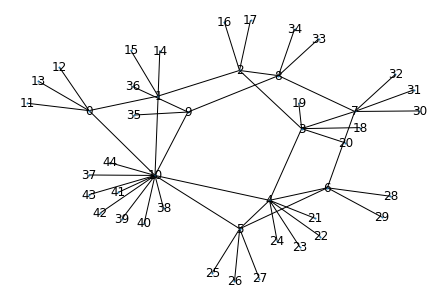

In [0]:
print(nx.is_connected(g_power))
nx.draw(g_power,node_size=1,with_labels=True)

### For each pair of the newly added nodes perform shortest-path routing using NetworkX and create a binary matrix $R$ such that each row of the matrix correspond to a core node and each column correspond to an ordered pair of newly added nodes. Each element of this matrix is "one" if the shortest path between the corresponding pair goes through the corresponding core node and "zero" otherwise. This matrix is sometimes called the routing matrix.


In [0]:
# Your code here
new_nodes=list(range(simple_g.order(),g_power.order()))
old=simple_g.order()
new=g_power.order()
t=[]
for i in range(old,new):
  for j in range(i+1,new):
    t.append((i,j))

#create matrix
rows=len(t)
cols=old
R=[[0 for i in range(cols)] for j in range(rows)]

n=0
for i in range(old,new):
  for j in range(i+1,new):
    route=nx.shortest_path(g_power,source=i,target=j)
    for k in range(1,len(route)-1):
      R[n][route[k]]=1
    n+=1

n=0
col=list(range(0,old))
print("       [",' '.join(map(str,col)),']')
for row in R:
  print (t[n]," ".join(map(str,row)))
  n+=1

       [ 0 1 2 3 4 5 6 7 8 9 10 ]
(11, 12) 1 0 0 0 0 0 0 0 0 0 0
(11, 13) 1 0 0 0 0 0 0 0 0 0 0
(11, 14) 1 1 0 0 0 0 0 0 0 0 0
(11, 15) 1 1 0 0 0 0 0 0 0 0 0
(11, 16) 1 1 1 0 0 0 0 0 0 0 0
(11, 17) 1 1 1 0 0 0 0 0 0 0 0
(11, 18) 1 1 1 1 0 0 0 0 0 0 0
(11, 19) 1 1 1 1 0 0 0 0 0 0 0
(11, 20) 1 1 1 1 0 0 0 0 0 0 0
(11, 21) 1 0 0 0 1 0 0 0 0 0 1
(11, 22) 1 0 0 0 1 0 0 0 0 0 1
(11, 23) 1 0 0 0 1 0 0 0 0 0 1
(11, 24) 1 0 0 0 1 0 0 0 0 0 1
(11, 25) 1 0 0 0 0 1 0 0 0 0 1
(11, 26) 1 0 0 0 0 1 0 0 0 0 1
(11, 27) 1 0 0 0 0 1 0 0 0 0 1
(11, 28) 1 0 0 0 1 0 1 0 0 0 1
(11, 29) 1 0 0 0 1 0 1 0 0 0 1
(11, 30) 1 0 0 0 0 1 1 1 0 0 1
(11, 31) 1 0 0 0 0 1 1 1 0 0 1
(11, 32) 1 0 0 0 0 1 1 1 0 0 1
(11, 33) 1 1 1 0 0 0 0 0 1 0 0
(11, 34) 1 1 1 0 0 0 0 0 1 0 0
(11, 35) 1 0 0 0 0 0 0 0 0 1 1
(11, 36) 1 0 0 0 0 0 0 0 0 1 1
(11, 37) 1 0 0 0 0 0 0 0 0 0 1
(11, 38) 1 0 0 0 0 0 0 0 0 0 1
(11, 39) 1 0 0 0 0 0 0 0 0 0 1
(11, 40) 1 0 0 0 0 0 0 0 0 0 1
(11, 41) 1 0 0 0 0 0 0 0 0 0 1
(11, 42) 1 0 0 0 0 0 0 0 0 0 1
(11, 

### Find the solution to the following linear programming using the $cvxpy$ library:
### $$ Maximize \sum X_{i,j} $$
### $$ s.t. \ \ X_{i,j} \ge 0 , RX\le B  $$

### Here, $B$ is a vector containing the maximum bandwidth of each of the core nodes. In this homework assume that all the elements of this vector are set to 10.

In [0]:
# !pip install cvxpy
from cvxpy import *

In [0]:
# Your code here
B=np.ones(11)*10
X=cvxpy.Variable(n,integer=True)
objective=cvxpy.Maximize(cvxpy.sum(X))
constraints=[X>=0,R*X<=B]
p=Problem(objective, constraints)
result=p.solve()
#print(X.value)
print(result)

110.0


### Now create a Barabasi-Albert random graph with the same number of nodes as the previous graph and $m=1$ and visualize it using Gephi.

In [0]:
# Your code here
from IPython.display import Image

g_pow_ba=nx.barabasi_albert_graph(g_power.order(),1)
nx.write_gml(g_pow_ba,"ba_pow.gml")

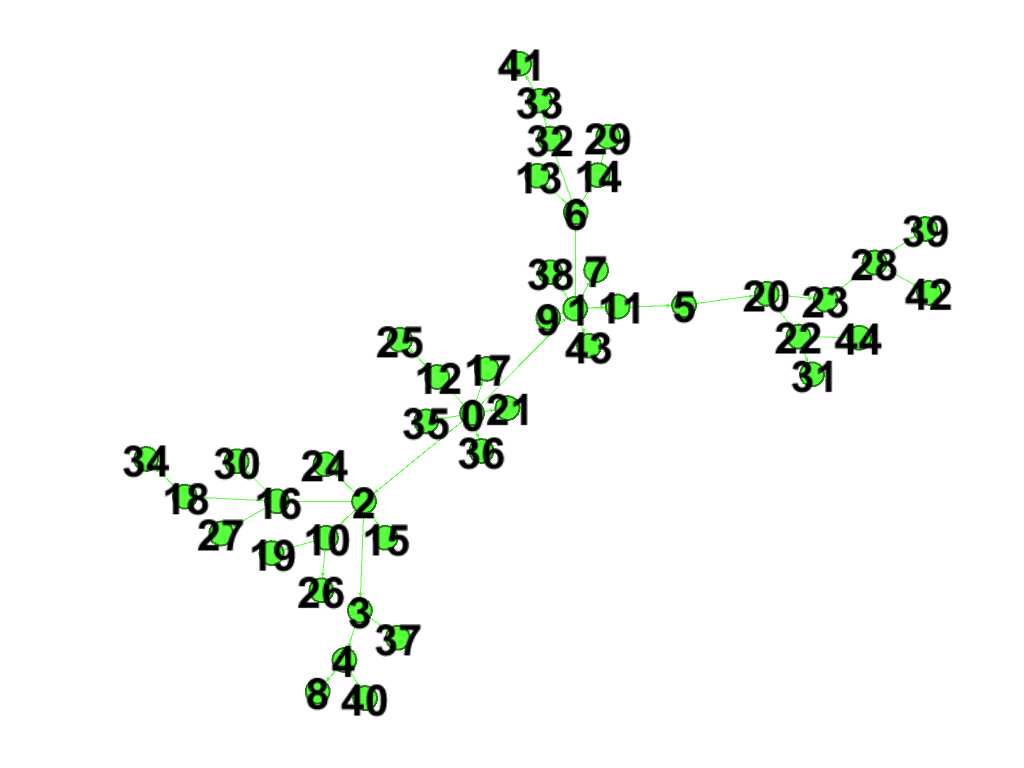

In [0]:
Image(filename='ba_pow.png')

### Calculate the routing matrix for this random graph with the first 11 nodes as the core. (Ignore the pairs whose shortest path does not go through the core.)

In [0]:
# Your code here

new_nodes=list(range(simple_g.order(),g_pow_ba.order()))
old=simple_g.order()
new=g_pow_ba.order()
t=[]
for i in range(old,new):
  for j in range(i+1,new):
    t.append((i,j))

#create matrix
rows=len(t)
cols=old
R_ba=[[0 for i in range(cols)] for j in range(rows)]

n=0
c=0
for i in range(old,new):
  for j in range(i+1,new):
    route=nx.shortest_path(g_pow_ba,source=i,target=j)
    for k in range(1,len(route)-1):
      if(route[k]<simple_g.order()):
        R_ba[n][route[k]]=1
    if(R_ba[n]==[0 for i in range(simple_g.order())]):
      del t[n]
      n-=1
      c+=1
    n+=1
if(c>0):
  del R_ba[-1:-1*c-1:-1]
n=0
col=list(range(0,old))

print("       [",' '.join(map(str,col)),']')
for row in R_ba:
  print (t[n]," ".join(map(str,(row))))
  n+=1

       [ 0 1 2 3 4 5 6 7 8 9 10 ]
(11, 12) 1 1 0 0 0 0 0 0 0 0 0
(11, 13) 0 1 0 0 0 0 1 0 0 0 0
(11, 14) 0 1 0 0 0 0 1 0 0 0 0
(11, 15) 1 1 1 0 0 0 0 0 0 0 0
(11, 16) 1 1 1 0 0 0 0 0 0 0 0
(11, 17) 1 1 0 0 0 0 0 0 0 0 0
(11, 18) 1 1 1 0 0 0 0 0 0 0 0
(11, 19) 1 1 1 0 0 0 0 0 0 0 1
(11, 20) 0 1 0 0 0 1 0 0 0 0 0
(11, 21) 1 1 0 0 0 0 0 0 0 0 0
(11, 22) 0 1 0 0 0 1 0 0 0 0 0
(11, 23) 0 1 0 0 0 1 0 0 0 0 0
(11, 24) 1 1 1 0 0 0 0 0 0 0 0
(11, 25) 1 1 0 0 0 0 0 0 0 0 0
(11, 26) 1 1 1 0 0 0 0 0 0 0 1
(11, 27) 1 1 1 0 0 0 0 0 0 0 0
(11, 28) 0 1 0 0 0 1 0 0 0 0 0
(11, 29) 0 1 0 0 0 0 1 0 0 0 0
(11, 30) 1 1 1 0 0 0 0 0 0 0 0
(11, 31) 0 1 0 0 0 1 0 0 0 0 0
(11, 32) 0 1 0 0 0 0 1 0 0 0 0
(11, 33) 0 1 0 0 0 0 1 0 0 0 0
(11, 34) 1 1 1 0 0 0 0 0 0 0 0
(11, 35) 1 1 0 0 0 0 0 0 0 0 0
(11, 36) 1 1 0 0 0 0 0 0 0 0 0
(11, 37) 1 1 1 1 0 0 0 0 0 0 0
(11, 38) 0 1 0 0 0 0 0 0 0 0 0
(11, 39) 0 1 0 0 0 1 0 0 0 0 0
(11, 40) 1 1 1 1 1 0 0 0 0 0 0
(11, 41) 0 1 0 0 0 0 1 0 0 0 0
(11, 42) 0 1 0 0 0 1 0 0 0 0 0
(11, 

### Now solve the previous optimization problem for this random graph and compare the result with the previous result. Which network has a higher performance and why?

In [0]:
# Your code here
B=np.ones(11)*10
X=cvxpy.Variable(n,integer=True)
objective=cvxpy.Maximize(cvxpy.sum(X))
constraints=[X>=0,R_ba*X<=B]
p=Problem(objective, constraints)
result=p.solve()
#print(X.value)
print(result)

60.0


We see that Barabasi-Albert Graph has higher performance compare to the simple graph we created since the optimization result of BA Graph is lower than that of simple graph. Also, Barabasi-Albert Graph is a tree graph, so it is much simplier to find the shortest distance between two nodes.




## Task 2: More on the Barabasi-Albert Model
### In the previous task, you evaluated the abilities of Barabasi-Albert networks to transfer data from one node to another. In this task, you will explore these networks further.
### Using NetworkX, generate four Barabasi-Albert Random Graphs (BARGs) with n = 1000, 10000 nodes and with parameters m = 2 , 5.

In [0]:
g_ba_32=nx.barabasi_albert_graph(1000,2)
g_ba_42=nx.barabasi_albert_graph(10000,2)
g_ba_35=nx.barabasi_albert_graph(1000,5)
g_ba_45=nx.barabasi_albert_graph(10000,5)
nx.write_gml(g_ba_32,"ba_32.gml")
nx.write_gml(g_ba_42,"ba_42.gml")
nx.write_gml(g_ba_35,"ba_35.gml")
nx.write_gml(g_ba_45,"ba_45.gml")

### Use NetworkX to store the graphs in .gml and then visualize them using Gephi such that each node has a size proportional to its degree and its color is also related to its degree. Include your visualizations in this notebook. Do you see an interesting property for these graphs? Explain your answer.

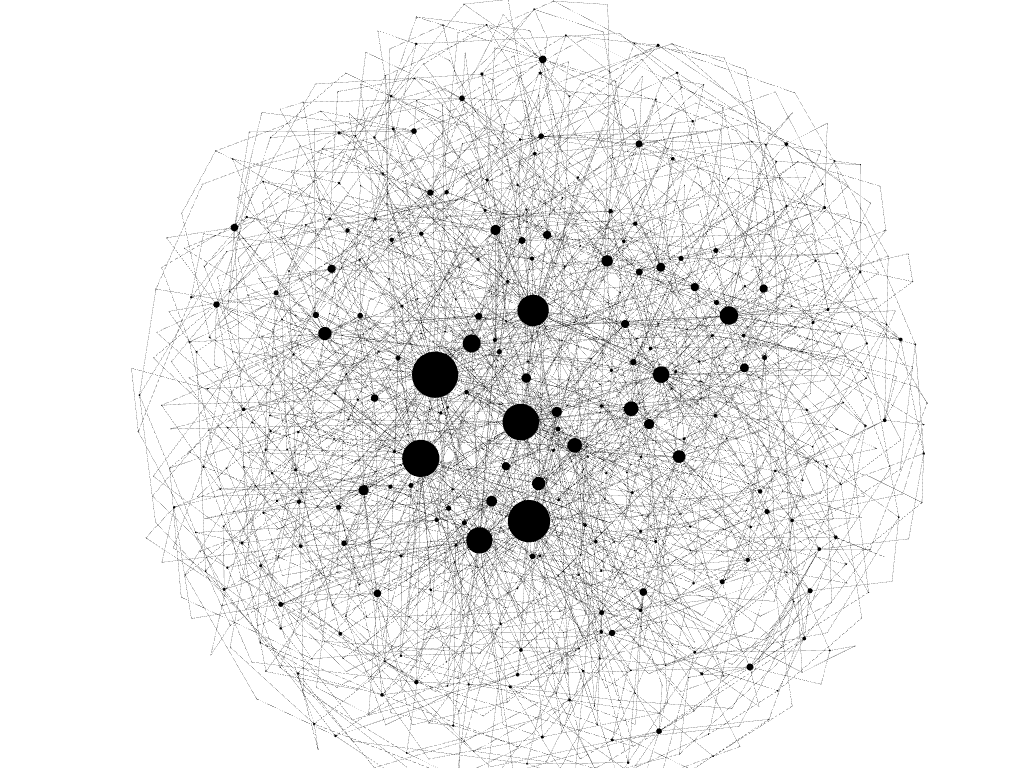

In [0]:
Image(filename='ba_32.png')

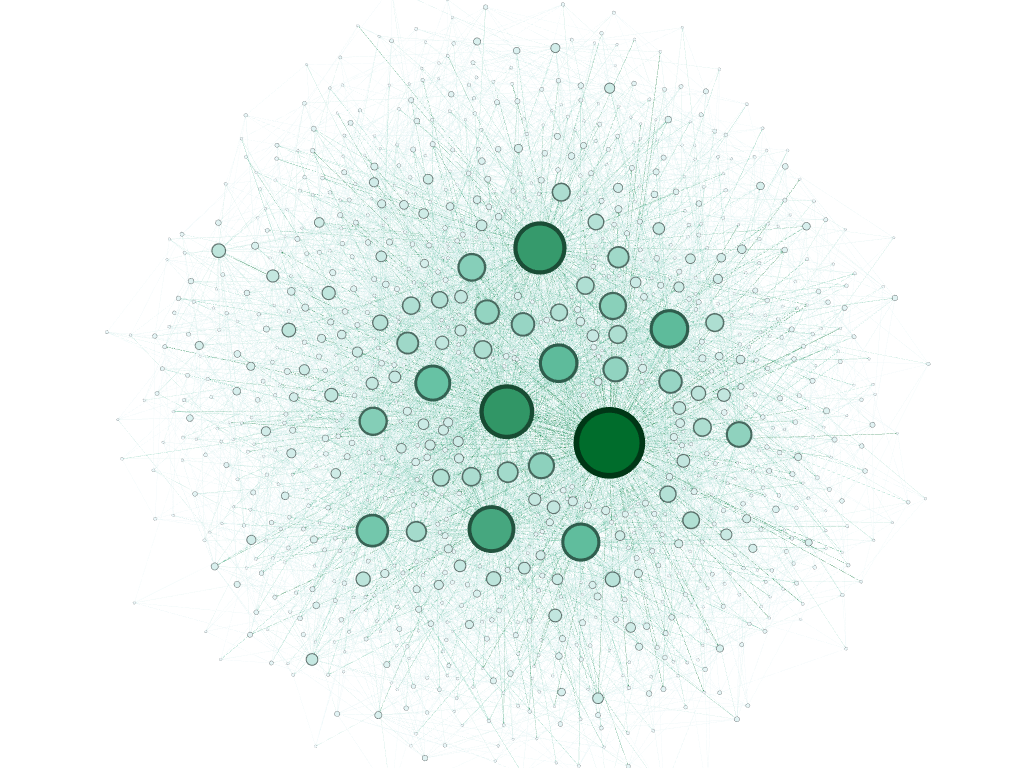

In [0]:
Image(filename='ba_35.png')

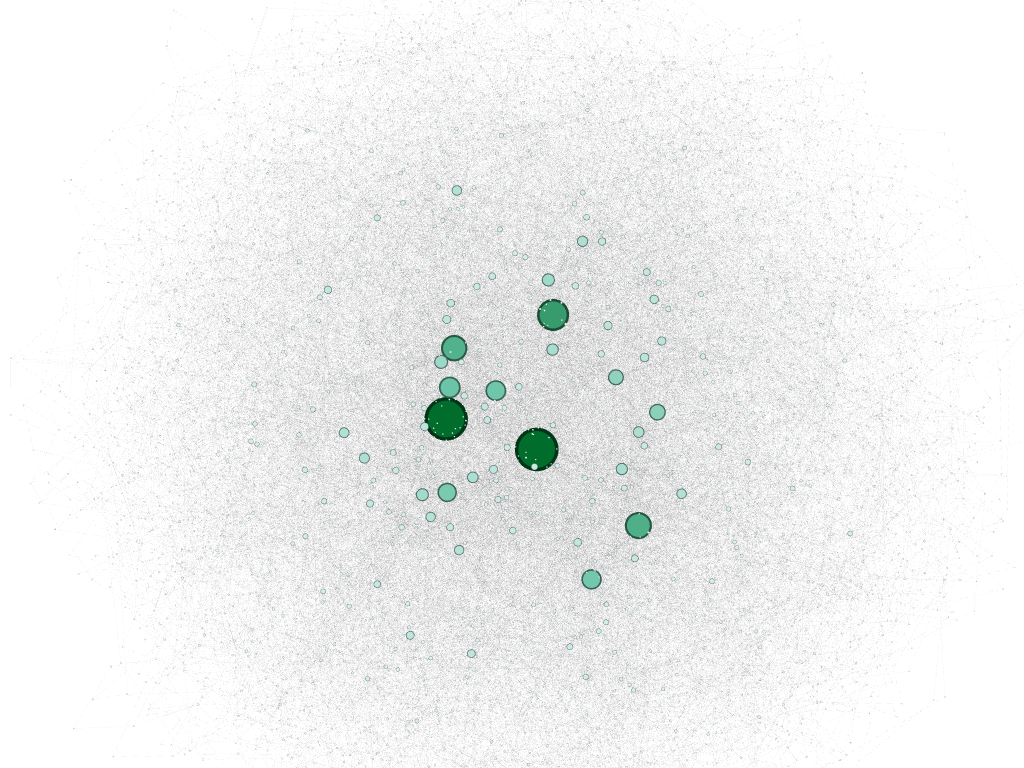

In [0]:
Image(filename='ba_42.png')

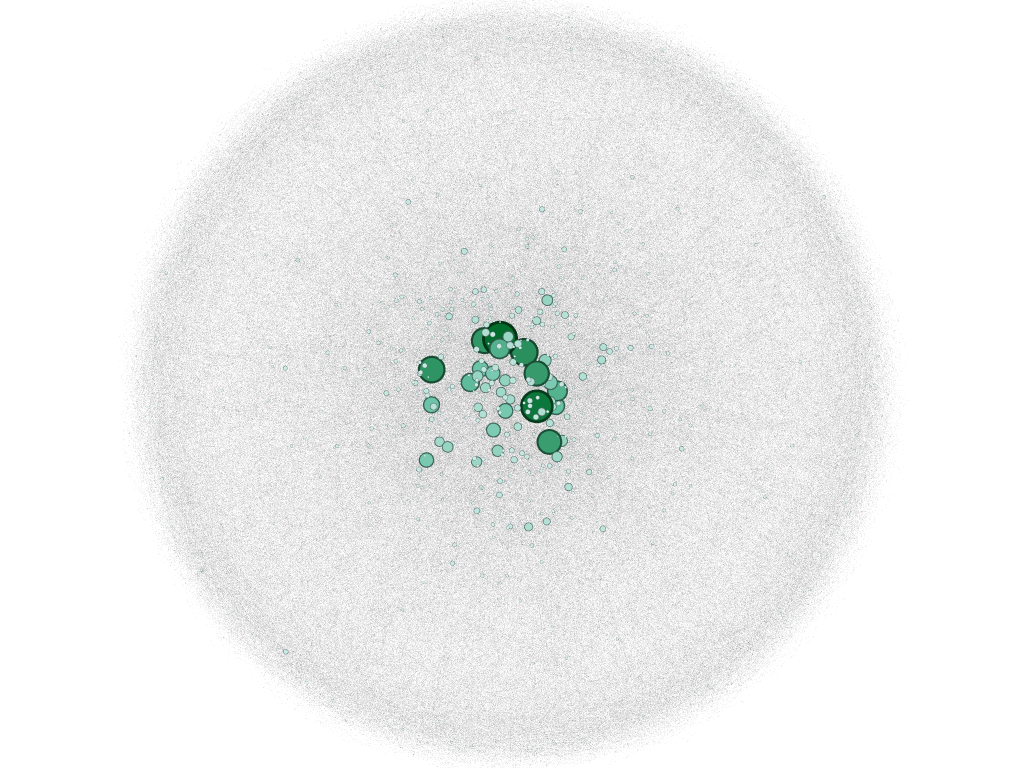

In [0]:
Image(filename='ba_45.png')

I see that Barabasi-Albert Graph follows power law distribution. With fix amount of nodes, as the parameter m increases, the amount of higher degree node increase as well. The reason is that m specifies the minimum degree for each node resulting higher chance of complex network.

Text(0.5, 1.0, 'BA Graph for m=5 node 10000')

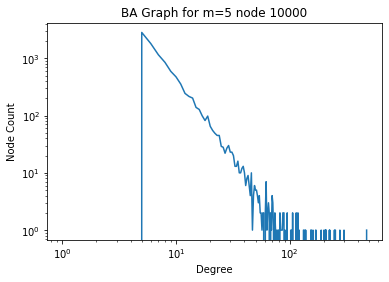

In [0]:
plt.loglog(nx.degree_histogram(g_ba_45))
plt.xlabel('Degree')
plt.ylabel('Node Count')
plt.title('BA Graph for m=5 node 10000')

### Calculate the diamater and the average shortest path lengths of these graphs. Also plot the (local) clustering coefficient of the nodes of these graphs. 

In [0]:
%%time
print("Diameter for m=2 node 1000:",nx.diameter(g_ba_32))
print("Average shortest path for m=2 node 1000:", nx.average_shortest_path_length(g_ba_32))
print("Diameter for m=2 node 10000:",nx.diameter(g_ba_42))
print("Average shortest path for m=2 node 10000:", nx.average_shortest_path_length(g_ba_42))
print("Diameter for m=5 node 1000:",nx.diameter(g_ba_35))
print("Average shortest path for m=5 node 1000:", nx.average_shortest_path_length(g_ba_35))
print("Diameter for m=5 node 10000:",nx.diameter(g_ba_45))
print("Average shortest path for m=5 node 10000:", nx.average_shortest_path_length(g_ba_45))

Diameter for m=2 node 1000: 7
Average shortest path for m=2 node 1000: 4.12576976976977
Diameter for m=2 node 10000: 9
Average shortest path for m=2 node 10000: 4.928672027202721
Diameter for m=5 node 1000: 5
Average shortest path for m=5 node 1000: 2.9824324324324323
Diameter for m=5 node 10000: 6
Average shortest path for m=5 node 10000: 3.657974617461746
CPU times: user 33min 47s, sys: 2.13 s, total: 33min 49s
Wall time: 33min 50s


Text(0.5, 1.0, 'BA Graph for m=2 node 1000')

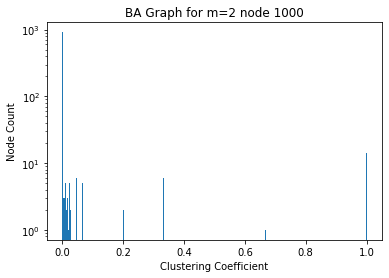

In [0]:
g_ba_32_clust=nx.clustering(g_ba_32)
plt.hist(g_ba_32_clust.values(),bins=500,log=True)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Node Count')
plt.title('BA Graph for m=2 node 1000')

Text(0.5, 1.0, 'BA Graph for m=2 node 10000')

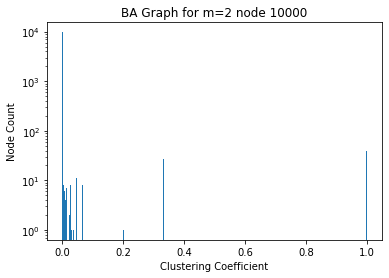

In [0]:
g_ba_42_clust=nx.clustering(g_ba_42)
plt.hist(g_ba_42_clust.values(),bins=500,log=True)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Node Count')
plt.title('BA Graph for m=2 node 10000')

Text(0.5, 1.0, 'BA Graph for m=5 node 1000')

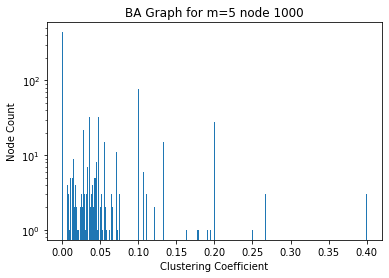

In [0]:
g_ba_35_clust=nx.clustering(g_ba_35)
plt.hist(g_ba_35_clust.values(),bins=500,log=True)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Node Count')
plt.title('BA Graph for m=5 node 1000')

Text(0.5, 1.0, 'BA Graph for m=5 node 10000')

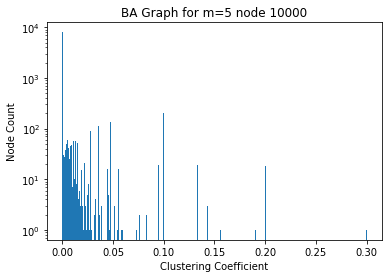

In [0]:
g_ba_45_clust=nx.clustering(g_ba_45)
plt.hist(g_ba_45_clust.values(),bins=500,log=True)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Node Count')
plt.title('BA Graph for m=5 node 10000')

## Task 3: Another Candidate Model for Describing Social Networks
### As you know, the Watts-Strogatz generative model was proposed in 1998 in order to address certain limitation(s) of Erdos-Renyi random graphs in the context of modeling real-world social networks. In this task and the next, you will examine the properties of Watts-Strogatz networks and compare them with those of Barabasi-Albert networks (one of whose objectives is to model social networks) as well as ER random graphs. 

### Using NetworkX generate three Watts-Strogatz Random Graphs (WSRGs) with n = 1000 nodes and with parameters k = 5, and p = 0.2, 0.5, and 0.8.

In [0]:
g_ws_2=nx.watts_strogatz_graph(1000,5,0.2)
g_ws_5=nx.watts_strogatz_graph(1000,5,0.5)
g_ws_8=nx.watts_strogatz_graph(1000,5,0.8)
nx.write_gml(g_ws_2,"ws_2.gml")
nx.write_gml(g_ws_5,"ws_5.gml")
nx.write_gml(g_ws_8,"ws_8.gml")

### Use NetworkX to store the graphs in .gml and then visualize them using Gephi. Include your visualizations in this notebook.

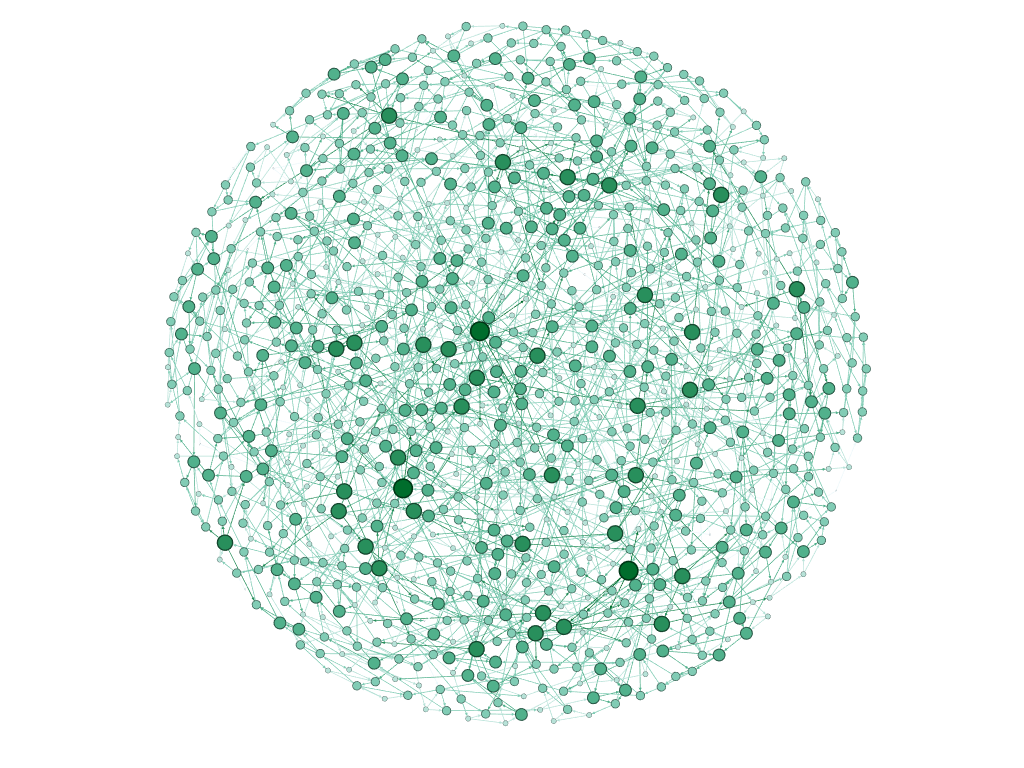

In [0]:
Image(filename='ws_2.png')

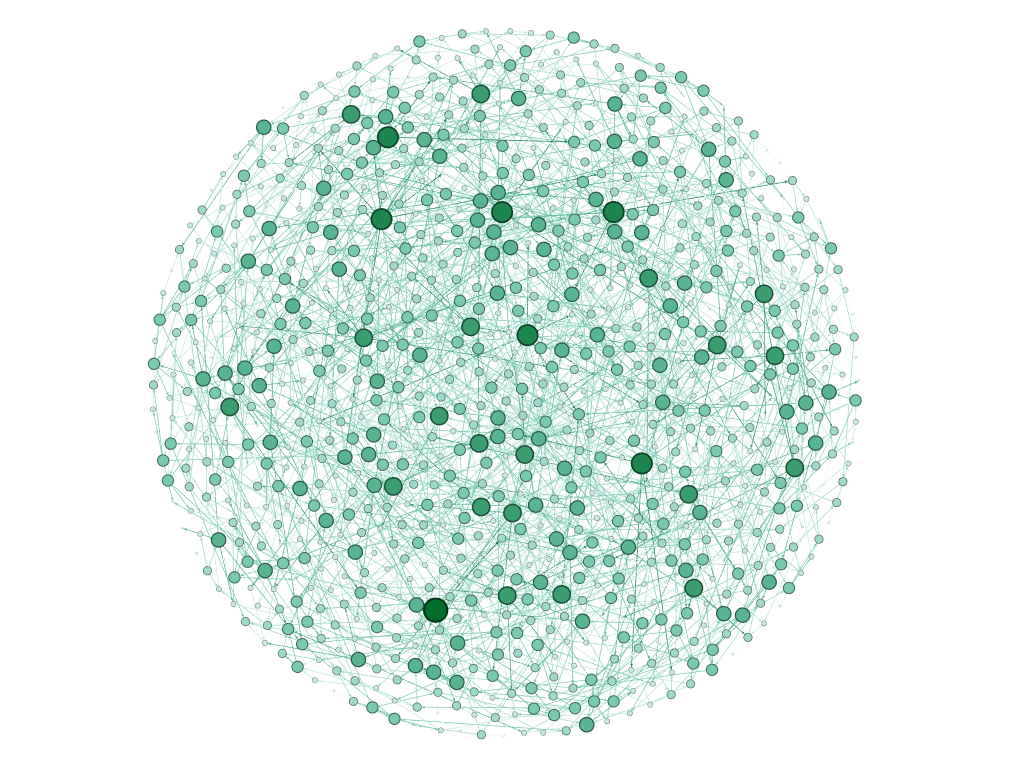

In [0]:
Image(filename='ws_5.png')

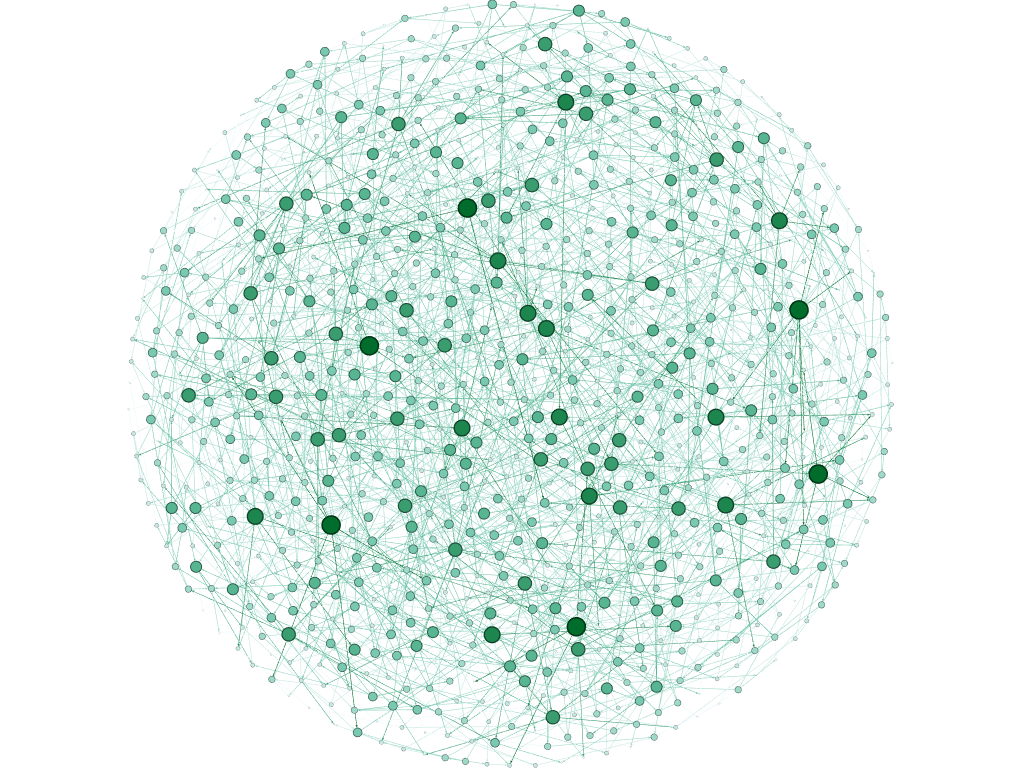

In [0]:
Image(filename='ws_8.png')

### Plot the degree distibution of these graphs in arithmetic and log-log scale figures. Based on the plots, do you think Watts-Strogatz networks follow a power-law degree distribution? Why or why not?

Text(0.5, 1.0, 'Watts-Strogatz Network for p=0.2')

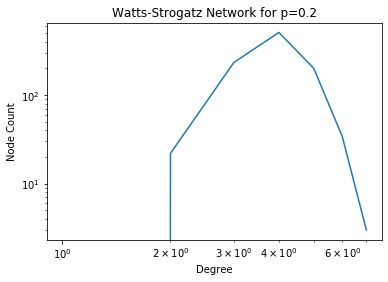

In [0]:
plt.loglog(nx.degree_histogram(g_ws_2))
plt.xlabel('Degree')
plt.ylabel('Node Count')
plt.title('Watts-Strogatz Network for p=0.2')

Text(0.5, 1.0, 'Watts-Strogatz Network for p=0.5')

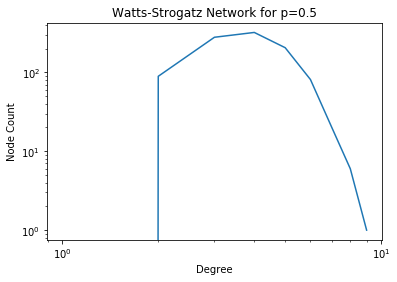

In [0]:
plt.loglog(nx.degree_histogram(g_ws_5))
plt.xlabel('Degree')
plt.ylabel('Node Count')
plt.title('Watts-Strogatz Network for p=0.5')

Text(0.5, 1.0, 'Watts-Strogatz Network for p=0.8')

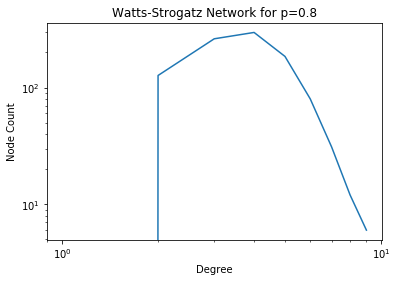

In [0]:
plt.loglog(nx.degree_histogram(g_ws_8))
plt.xlabel('Degree')
plt.ylabel('Node Count')
plt.title('Watts-Strogatz Network for p=0.8')

Although the degree distribution looks almost like a power-law degree distribution, I don't think Watts-Strogatz Graph is scale-free networks because it does not have heavy tail when degree is large. In addition, the interval of degree of nodes is between 2 and 100, which is shorter than Barabasi-Albert Graph.

### Calculate the diamaters and the average shortest path lengths of these graphs. Also plot the clustering coefficients of the nodes of these graphs. Compare these results with the ones you obtained for the Barabasi-Albert model. Based on this comparison, which of the two models is a better choice for describing online social networks in your opinion? Explain your answer.

In [0]:
%%time
print("Diameter for p=0.2: ",nx.diameter(g_ws_2))
print("Average shortest path for p=0.2: ", nx.average_shortest_path_length(g_ws_2))
print("Diameter for p=0.5: ",nx.diameter(g_ws_5))
print("Average shortest path for p=0.5: ", nx.average_shortest_path_length(g_ws_5))
print("Diameter for p=0.8: ",nx.diameter(g_ws_8))
print("Average shortest path for p=0.8: ", nx.average_shortest_path_length(g_ws_8))

Diameter for p=0.2:  12
Average shortest path for p=0.2:  6.91844044044044
Diameter for p=0.5:  10
Average shortest path for p=0.5:  5.616754754754755
Diameter for p=0.8:  9
Average shortest path for p=0.8:  5.343767767767768
CPU times: user 17.9 s, sys: 5.98 ms, total: 17.9 s
Wall time: 18 s


When describing online social networks, I believe Watts-Strogatz Graph is more suitable for describing it. When people form a small group for common goals or characteristics, such group usually have a leader to coordinate memebers. The leader should always has a relation to group member. Therefore, as the amount of people increases, the amount of groups increases and thus the leader increases. In WS graph, we can see more high degree nodes in WS graph than in BA graph. BA graph only consists few nodes with high degree even the number of nodes increases, which I believe is unrealistic in online ocial network.

### Now, consider a network that describes the hierarchical structure of an organization, i.e., a network that captures the hierarchical connections between the employees of the organization. It is a network in which two employees are connected by an edge if and only if one of them is the immediate supervisor/boss of the other. Do you think either of the two models that you have examined so far is suitable for describing such a hierarchical network? Why or why not? You may assume that if an employee has two or more immediate supervisors, then all of these supervisors are located at the same level in the hierarchy of the organization.

I believe Barabasi-Albert Model is more suitable for describing the hierarchical network. An organization usually has only few bosses or CEOs that has all the email addresses and contact information of all its employees, resulting in highest degree in the network. On the other hand, entry employees only has contact information of his boss and collegues, resulting in lowest degree in the network. Since entry employees grows proportionally and CEO remain stable as company grows, the structure follows scale-free network and abide power law distribution. Therefore, I believe Barabasi-Albert Model is more suitable in this situation because it is scale free network.

## Task 4 (Bonus Task): Do the above models outperform ER Random Graphs?

### Using NetworkX, generate six Erdos-Renyi Random Graphs (ERRGs) with n = 1000 nodes and with parameters p = 0.5/n, 1/n, 1.5/n, 0.5ln(n)/n, ln(n)/n, 1.5ln(n)/n.

In [0]:
n=1000
g_er_1=nx.erdos_renyi_graph(n,0.5/n)
g_er_2=nx.erdos_renyi_graph(n,1/n)
g_er_3=nx.erdos_renyi_graph(n,1.5/n)
g_er_4=nx.erdos_renyi_graph(n,0.5*np.log(n)/n)
g_er_5=nx.erdos_renyi_graph(n,np.log(n)/n)
g_er_6=nx.erdos_renyi_graph(n,1.5*np.log(n)/n)

### Calculate the diamaters and the average shortest path lengths of these graphs. Also plot the clustering coefficients of the nodes of these graphs. Compare these results with the ones you obtained for the previous models. Based on your comparison, do you think that the Barabasi-Albert and the Watts-Strogatz models are better choices than the Erdos-Renyi Model for describing online social networks? Explain your answer.

In [0]:
def largest_graph(g_er):
  max_dia=0
  ind=0
  index=0
  large_sub=0
  gsub=nx.connected_components(g_er)
  for i in gsub:
    t=nx.diameter(g_er.subgraph(i))
    if(t>max_dia):
      large_sub=i
      index=ind
      max_dia=t
    ind+=1
  return max_dia,g_er.subgraph(large_sub)

In [0]:
%%time
g_er_sub_1_dia,g_er_sub_1=largest_graph(g_er_1)
print("Diameter for p=0.5/n:",g_er_sub_1_dia)
print("Average shortest path for p=0.5/n:", nx.average_shortest_path_length(g_er_sub_1))
g_er_sub_2_dia,g_er_sub_2=largest_graph(g_er_2)
print("Diameter for p=1/n:",g_er_sub_2_dia)
print("Average shortest path for p=1/n:", nx.average_shortest_path_length(g_er_sub_2))
g_er_sub_3_dia,g_er_sub_3=largest_graph(g_er_3)
print("Diameter for p=1.5/n:",g_er_sub_3_dia)
print("Average shortest path for p=1.5/n:", nx.average_shortest_path_length(g_er_sub_3))
g_er_sub_4_dia,g_er_sub_4=largest_graph(g_er_4)
print("Diameter for p=0.5ln(n)/n:",g_er_sub_4_dia)
print("Average shortest path for p=0.5ln(n)/n:", nx.average_shortest_path_length(g_er_sub_4))
g_er_sub_5_dia,g_er_sub_5=largest_graph(g_er_5)
print("Diameter for p=ln(n)/n:",g_er_sub_5_dia)
print("Average shortest path for p=ln(n)/n:", nx.average_shortest_path_length(g_er_sub_5))
g_er_sub_6_dia,g_er_sub_6=largest_graph(g_er_6)
print("Diameter for p=1.5ln(n)/n:",g_er_sub_6_dia)
print("Average shortest path for p=1.5ln(n)/n:", nx.average_shortest_path_length(g_er_sub_6))

Diameter for p=0.5/n: 5
Average shortest path for p=0.5/n: 2.3333333333333335
Diameter for p=1/n: 26
Average shortest path for p=1/n: 9.367737747484583
Diameter for p=1.5/n: 35
Average shortest path for p=1.5/n: 12.993154488976144
Diameter for p=0.5ln(n)/n: 13
Average shortest path for p=0.5ln(n)/n: 5.694480738905159
Diameter for p=ln(n)/n: 7
Average shortest path for p=ln(n)/n: 3.835073073073073
Diameter for p=1.5ln(n)/n: 5
Average shortest path for p=1.5ln(n)/n: 3.21802002002002
CPU times: user 1min 35s, sys: 43.5 ms, total: 1min 35s
Wall time: 1min 35s


Text(0.5, 1.0, 'ER Graph for p=0.5/n')

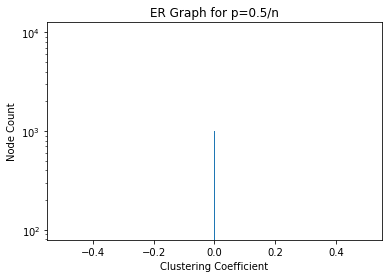

In [0]:
g_er_1_clust=nx.clustering(g_er_1)
plt.hist(g_er_1_clust.values(),bins=500,log=True)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Node Count')
plt.title('ER Graph for p=0.5/n')

Text(0.5, 1.0, 'ER Graph for p=1/n')

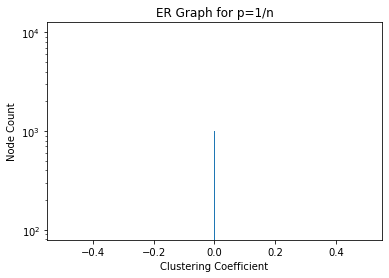

In [0]:
g_er_2_clust=nx.clustering(g_er_2)
plt.hist(g_er_2_clust.values(),bins=500,log=True)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Node Count')
plt.title('ER Graph for p=1/n')

Text(0.5, 1.0, 'ER Graph for p=1.5/n')

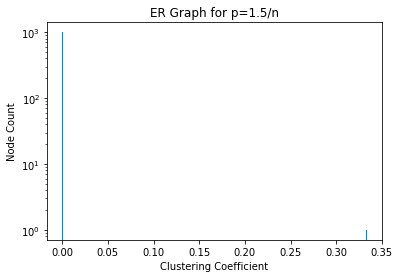

In [0]:
g_er_3_clust=nx.clustering(g_er_3)
plt.hist(g_er_3_clust.values(),bins=500,log=True)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Node Count')
plt.title('ER Graph for p=1.5/n')

Text(0.5, 1.0, 'ER Graph for p=0.5ln(n)/n')

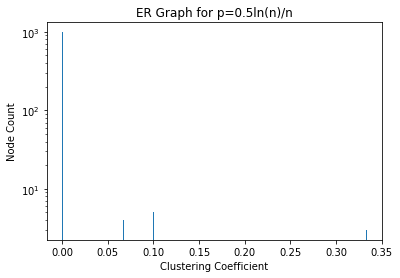

In [0]:
g_er_4_clust=nx.clustering(g_er_4)
plt.hist(g_er_4_clust.values(),bins=500,log=True)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Node Count')
plt.title('ER Graph for p=0.5ln(n)/n')

Text(0.5, 1.0, 'ER Graph for p=ln(n)/n')

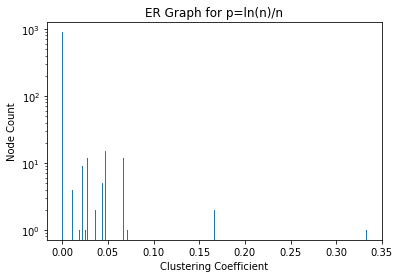

In [0]:
g_er_5_clust=nx.clustering(g_er_5)
plt.hist(g_er_5_clust.values(),bins=500,log=True)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Node Count')
plt.title('ER Graph for p=ln(n)/n')

Text(0.5, 1.0, 'ER Graph for p=1.5ln(n)/n')

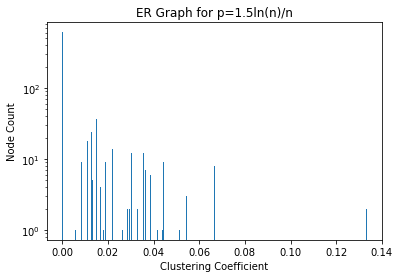

In [0]:
g_er_6_clust=nx.clustering(g_er_6)
plt.hist(g_er_6_clust.values(),bins=500,log=True)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Node Count')
plt.title('ER Graph for p=1.5ln(n)/n')

For online social networks, I believe Erdos-Renyi Model is more suitable for describing it. We see that two other networks are all connected graph while ER graph has possibility of creating at least two unconnnected graph, which is more realistic to the social network. For example, people in different countries may have no connection to each other. In addition, in the ER graph, as probability p increase from 1/n to 1.5ln(n)/n, average path decreases from 10 to 3. This behavior is similar to social network, as time increase, individual meet new people and shorten the path of connection. WS Graph has average path around 5 to 7 as p changes, and BA Graph has average path below 5. For me, these two results do not consist to the real world experience.